# CRWA Data Cleaning
In this notebook, we do some preliminary data cleaning on the CRWA's CRWA's water sample database, `CRWA_Sampling_Database_20191119_LLK.accdb`. The original data is stored in a zip file in the `/data/charles_river_samples_access` folder, but in this document, we are working with a version of the data exported to CSV format, which is available in the `/data/charles_river_samples_csv` folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime
import sys

In [2]:
for file in os.listdir("../data/charles_river_samples_csv/"):
    print(file)

Activity_Type.csv
Actual_Result_Type.csv
Actual_Result_Units.csv
Analytical_Methods.csv
Collection_Method.csv
Component.csv
Data_Type.csv
Media_Subdivision.csv
Media_Type.csv
Monitoring_Sites.csv
Project_ID.csv
Rainfall.csv
Relative_Depth.csv
Reporting_Result_Type.csv
Reporting_Result_Units.csv
Results.csv
SiteTypes.csv
Waterbody_Name.csv


In [3]:
data_dir = "../data/charles_river_samples_csv/"
df_dict = {file[:-4]:pd.read_csv(data_dir+file, encoding="latin-1") for file in os.listdir(data_dir)}

In [4]:
df_dict["Results"].head()

,Activity_ID,Lab_ID,Date_Collected,Time_Collected,Site_ID,Project_ID,Component_ID,Actual_Result,Actual_Result_Unit_ID,Activity_Type_ID,...,Data_Type_ID,Media_Type_ID,Media_Subdivision_ID,Relative_Depth_ID,Result_Comment,Field_Comment,Event_Comment,QAQC_Comment,Percent_RPD,QAQC_Status
0,720160412ROV1DTH01,None,4/12/2016 0:00:00,12/30/1899 5:58:00,ROV1,7.0,8.0,0.67,5.0,1.0,...,2.0,1.0,21.0,1.0,NaN,Water very still,NaN,NaN,NaN,Final-Accepted
1,720160412ROV1Temp01,None,4/12/2016 0:00:00,12/30/1899 5:58:00,ROV1,7.0,26.0,14.5,4.0,1.0,...,2.0,1.0,21.0,1.0,NaN,Water very still,NaN,NaN,NaN,Final-Accepted
2,720160517ROV1DTH01,None,5/17/2016 0:00:00,12/30/1899 5:58:00,ROV1,7.0,8.0,0.46,5.0,1.0,...,2.0,1.0,21.0,1.0,NaN,NaN,NaN,NaN,NaN,Final-Accepted
3,720160517ROV1Temp01,None,5/17/2016 0:00:00,12/30/1899 5:58:00,ROV1,7.0,26.0,15,4.0,1.0,...,2.0,1.0,21.0,1.0,NaN,NaN,NaN,NaN,NaN,Final-Accepted
4,720160719ROV1DTH01,None,7/19/2016 0:00:00,12/30/1899 6:45:00,ROV1,7.0,8.0,0.33,5.0,1.0,...,2.0,1.0,21.0,1.0,NaN,Water wasn't deep enough to use basket sampler...,NaN,NaN,NaN,Final-Accepted


In [5]:
df_dict["Results"] = pd.read_csv("../data/charles_river_samples_interim/results_merged.csv")

In [6]:
with pd.option_context("display.max_columns", None):
    for title, df in df_dict.items():
        display(title, df.head())

'Activity_Type'

,Activity_Type_ID,Activity_Type
0,1,Field Msr/Obs
1,2,Field Msr/Obs-Portable Data Logger
2,3,Quality Control Sample-Equipment Blank
3,4,Quality Control Sample-Equipment Replicate
4,5,Quality Control Sample-Field Replicate


'Actual_Result_Type'

,Result_Type_ID,Result_Type
0,1,Actual
1,2,Calculated


'Actual_Result_Units'

,Unit_ID,Unit_Abbreviation,Unit_Description
0,1,% Sat,Percent Saturation
1,2,cells/ml,Cells per Milliliter
2,3,cfu/100ml,Colony Forming Units per 100 Milliliters
3,4,deg C,Degrees Celsius (Centigrade)
4,5,ft,Feet


'Analytical_Methods'

,Analytical_Method_ID,Lab_Name,Parameter,Analysis_ID,Analysis_ID_Source,Analysis_Name,CRWA_References,Data_Type,Container_Type,Sample_Volume,Container_Color,Sterile_Bottle,Chemical_Preserv,Thermal_Preserv,Other_Instructions,Holding_Time,MDL,Reporting_Limit,Action_Limit,Matrix
0,Alpha-BOD,Alpha,BOD5,405.1,USEPA,5 Day Biochemical Oxygen Demand,QAPP 2007-2009 Revision 2,C,Plastic,1000.0,NaN,NaN,None required,Cool to 4°C,None,6 hrs/48 hrs,0.5 mg/l,2.0 mg/l,110 mg/l (p),"RW, SW"
1,Alpha-BOD-2012,Alpha,BOD5,405.1/5210B,USEPA/APHA,5 Day Biochemical Oxygen Demand,QAPP 2010-2012 Revision 1,C,Plastic,1000.0,NaN,NaN,None required,Cool to 4°C,None,6 hrs/48 hrs,0.5 mg/l,2.0 mg/l,110 mg/l (a-2),"RW, SW"
2,Alpha-CBOD,Alpha,CBOD5,5210B,APHA,5 Day Carbonaceous Biochemical Oxygen Demand,QAPP 2007-2009 Revision 2,C,Plastic,1000.0,NaN,NaN,None required,Cool to 4°C,None,6 hrs/48 hrs,0.5 mg/l,1.3 mg/l,110 mg/l (p),"RW, SW"
3,Alpha-CBOD-2012,Alpha,CBOD5,405.1/5210B,USEPA/APHA,5 Day Carbonaceous Biochemical Oxygen Demand,QAPP 2010-2012 Revision 1,C,Plastic,1000.0,NaN,NaN,None required,Cool to 4°C,None,6 hrs/48 hrs,0.5 mg/l,1.3 mg/l,110 mg/l (a-2),"RW, SW"
4,Alpha-ChlorA,Alpha,Chlorophyll a,446,USEPA,Specrophotometric Determination,QAPP 2007-2009 Revision 2,C,Plastic,1000.0,Amber,NaN,None required,Cool to 4°C,"filter, freeze, keep filter in dark","Filter within 6 hrs, hold up to 21 days",0.001 mg/l,0.002 mg/l,0.0037 mg/l (u),"RW, SW"


'Collection_Method'

,Collection_ID,Collection_ID_Source,Collection_Name,Collection_Equip,SOP_Name
0,C-BABN,CRWA,Critical basket from bank,Water Sampler (Other),FDSMPL-O-10 012711 Rev. 10
1,C-BABO,CRWA,Critical basket from boat,Water Sampler (Other),FDSMPL-O-10 012711 Rev. 10
2,C-BABR,CRWA,Critical basket from bridge,Water Sampler (Other),FDSMPL-O-10 012711 Rev. 10
3,C-BAW,CRWA,Critical basket while wading,Water Sampler (Other),FDSMPL-O-10 012711 Rev. 10
4,C-BESW,CRWA,Critical stormwater sample collection with dec...,Water Sampler (Other),FDSMPL-O-10 012711 Rev. 10


'Component'

,Component_ID,Component_Name
0,1,"Algae, blue-green (phylum cyanophyta) density"
1,2,Ammonia
2,3,Ammonium
3,4,Barometric pressure
4,5,Chlorine


'Data_Type'

,Data_Type_ID,Data_Type_Name
0,1,Critical
1,2,Non-critical
2,3,Unknown


'Media_Subdivision'

,Media_Subdivision_ID,Media_Subdivision_Name
0,1,Ambient Air
1,2,Const. Material
2,3,Drinking Water
3,4,Dry Fall Material
4,5,Filter Residue


'Media_Type'

,Media_Type_ID,Media_Type_Name
0,1,Water
1,2,Air
2,3,Biological
3,4,Habitat
4,5,Sediment


'Monitoring_Sites'

,Site_ID,Site_Name,Town,Org_ID,Org_Name,SiteTypeID,WaterbodyID,Latitude_DD,Longitude_DD,Coordinate_Collection_Method,Datum,HUC8,HUC10,HUC12,WBID,WBID_Year,River_Mile_Headwaters,River_Mile_Mouth,River_Mile_Collection_Method,Site_Description,Site_Comment,Alternate_ID,Alternate_ID_Source
0,012S,Watertown Dam Footbridge,Watertown,CRWA,Charles River Watershed Association,1.0,4.0,42.3651,-71.1903,Interpolation-Digital Map Srce (Tiger),NAD83,1090001.0,109000107.0,1.090001e+10,MA72-07_2002,NaN,69.5 MI,10.5,NaN,"42-21.92, 71-11.39, ABOVE WATERTOWN DAM AT FOO...",NaN,NaN,NaN
1,12CS,Above Waterworks Dam,Milford,CRWA,Charles River Watershed Association,1.0,4.0,42.1738,-71.5084,GPS- Unspecified,NAD83,1090001.0,109000106.0,1.090001e+10,NaN,NaN,NaN,NaN,NaN,"Cedar St, Rt 85, above Waterworks Dam",NaN,NaN,NaN
2,130S,Maple St. Bridge,Bellingham,CRWA,Charles River Watershed Association,1.0,4.0,42.1195,-71.4534,Interpolation-Digital Map Srce (Tiger),NAD83,1090001.0,109000106.0,1.090001e+10,MA72-04_2002,NaN,13.0 MI,67,NaN,"MAPLE STREET BRIDGE, BELLINGHAM",NaN,13CS,CRWA
3,13CS,Maple St,Bellingham,CRWA,Charles River Watershed Association,1.0,4.0,42.1195,-71.4534,GPS- Unspecified,NAD83,1090001.0,109000106.0,1.090001e+10,NaN,NaN,NaN,NaN,NaN,"Maple St below N Bellingham Dam, just below 129S",NaN,NaN,NaN
4,143S,Outlet Caryville Dam,Bellingham,CRWA,Charles River Watershed Association,1.0,4.0,42.1311,-71.4442,GPS- Unspecified,NAD83,1090001.0,109000106.0,1.090001e+10,NaN,NaN,NaN,NaN,NaN,Outlet Caryville Dam,NaN,NaN,NaN


'Project_ID'

,Project_ID,Project_Code,Project_Name,WetDry_Definition,Rain_Gauge
0,1,CYN,Cyanobacteria,"Events with greater than 0.1"" of rain in the p...",Logan
1,2,FIFI,Find It and Fix It,NaN,NaN
2,3,FLG,Flagging,"Events with greater than 0.2"" of rain in the p...",Logan
3,4,FLOW,Flow Monitoring,NaN,NaN
4,5,MC,Mystic Collaborative,NaN,NaN


'Rainfall'

,DATE,ID,Precipitation
0,01/01/1995,1,1.07
1,01/02/1995,2,0.44
2,01/03/1995,3,0.00
3,01/04/1995,4,0.00
4,01/05/1995,5,0.00


'Relative_Depth'

,Relative_Depth_ID,Relative_Depth_Name
0,1,Surface
1,2,Midwater
2,3,Near Bottom
3,4,Bottom
4,5,Subbottom


'Reporting_Result_Type'

,Result_Type_ID,Result_Type
0,1,Actual
1,2,Calculated


'Reporting_Result_Units'

,Unit_ID,Unit_Abbreviation,Unit_Description
0,1,% Sat,Percent Saturation
1,2,cells/ml,Cells per Milliliter
2,3,cfu/100ml,Colony Forming Units per 100 Milliliters
3,4,deg C,Degrees Celsius (Centigrade)
4,5,ft,Feet


'Results'

,Date_Collected_Time_Collected,Activity_ID,Lab_ID,Site_ID,Project_ID,Actual_Result,Actual_Result_Unit_ID,Result_Sample_Fraction,Reporting_Result,Reporting_Result_Unit_ID,Collection_ID,Analytical_Method_ID,Associated_ID,Result_Comment,Field_Comment,Event_Comment,QAQC_Comment,Percent_RPD,QAQC_Status,Data_Type_Name,Media_Type_Name,Media_Subdivision_Name,Component_Name,Activity_Type,Result_Type_ID_x,Result_Type_x,Result_Type_ID_y,Result_Type_y,Relative_Depth_Name
0,2016-04-12 05:58:00,720160412ROV1DTH01,None,ROV1,7.0,0.67,5.0,NaN,0.67,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water very still,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
1,2016-05-17 05:58:00,720160517ROV1DTH01,None,ROV1,7.0,0.46,5.0,NaN,5.50,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,NaN,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
2,2016-07-19 06:45:00,720160719ROV1DTH01,None,ROV1,7.0,0.33,5.0,NaN,0.33,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water wasn't deep enough to use basket sampler...,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
3,2016-07-19 07:00:00,720160719ROV2DTH01,None,ROV2,7.0,0.5,5.0,NaN,0.50,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water was stagnant in wide area after narrow r...,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
4,2016-08-16 07:17:00,720160816ROV1DTH01,None,ROV1,7.0,0.33,5.0,NaN,0.33,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water very low,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface


'SiteTypes'

,SiteTypeID,SiteTypeName
0,1,River/Stream
1,2,Facility Municipal Sewage (POTW)
2,3,Storm Sewer
3,4,Combined Sewer
4,5,Pipe


'Waterbody_Name'

,WaterbodyID,WaterbodyName
0,1,Beaver Brook
1,2,Bogastow Brook
2,3,Canterbury Brook
3,4,Charles River
4,5,Cheesecake Brook


In [7]:
results = df_dict["Results"]

In [8]:
with pd.option_context("display.max_columns", None):
    display(results.head())
    display(results["Result_Type_ID_x"].value_counts())

,Date_Collected_Time_Collected,Activity_ID,Lab_ID,Site_ID,Project_ID,Actual_Result,Actual_Result_Unit_ID,Result_Sample_Fraction,Reporting_Result,Reporting_Result_Unit_ID,Collection_ID,Analytical_Method_ID,Associated_ID,Result_Comment,Field_Comment,Event_Comment,QAQC_Comment,Percent_RPD,QAQC_Status,Data_Type_Name,Media_Type_Name,Media_Subdivision_Name,Component_Name,Activity_Type,Result_Type_ID_x,Result_Type_x,Result_Type_ID_y,Result_Type_y,Relative_Depth_Name
0,2016-04-12 05:58:00,720160412ROV1DTH01,None,ROV1,7.0,0.67,5.0,NaN,0.67,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water very still,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
1,2016-05-17 05:58:00,720160517ROV1DTH01,None,ROV1,7.0,0.46,5.0,NaN,5.50,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,NaN,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
2,2016-07-19 06:45:00,720160719ROV1DTH01,None,ROV1,7.0,0.33,5.0,NaN,0.33,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water wasn't deep enough to use basket sampler...,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
3,2016-07-19 07:00:00,720160719ROV2DTH01,None,ROV2,7.0,0.5,5.0,NaN,0.50,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water was stagnant in wide area after narrow r...,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface
4,2016-08-16 07:17:00,720160816ROV1DTH01,None,ROV1,7.0,0.33,5.0,NaN,0.33,5.0,N-MGBN,Field-Depth-2012,NaN,NaN,Water very low,NaN,NaN,NaN,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,1,Actual,1,Actual,Surface


1    46450
Name: Result_Type_ID_x, dtype: int64

In [9]:
for col in results.columns:
    display(col, results[col].value_counts())

'Date_Collected_Time_Collected'

1998-03-10 06:00:00    175
2018-06-19 06:00:00    172
1999-06-15 06:00:00    146
1998-06-09 06:00:00    140
2017-09-19 06:00:00    138
                      ... 
2010-11-16 06:02:00      1
2006-07-19 10:30:00      1
2004-08-10 07:58:00      1
1995-11-15 05:58:00      1
2010-04-13 06:03:00      1
Name: Date_Collected_Time_Collected, Length: 6353, dtype: int64

'Activity_ID'

VMM20030819662SEC01      1
CYN20110822CBSC01        1
VMM20000718378STemp01    1
VMM19960604267STemp01    1
VMM19980609387SOP01      1
                        ..
CYN200809024LONGTMP02    1
VMM20120110387STemp01    1
CYN200807084LONGPH01     1
VMM19960903267STemp01    1
VMM19961001635SFC01      1
Name: Activity_ID, Length: 46450, dtype: int64

'Lab_ID'

None           21381
Unknown          652
LabID            355
none              91
NONE              39
               ...  
L0704916-27        1
L0704913-09        1
L0909868-20        1
L0512420-08        1
98006666           1
Name: Lab_ID, Length: 11984, dtype: int64

'Site_ID'

012S     1576
534S     1541
35CS     1530
290S     1529
662S     1528
         ... 
635S        1
715s        1
34CS        1
700S        1
700s        1
Name: Site_ID, Length: 244, dtype: int64

'Project_ID'

7.0    33485
3.0     5370
1.0     5035
2.0     1504
5.0     1056
Name: Project_ID, dtype: int64

'Actual_Result'

20          1060
10          1044
5            429
30           415
40           382
            ... 
0.539          1
14.59          1
1.12696        1
1.361952       1
375.2          1
Name: Actual_Result, Length: 6937, dtype: int64

'Actual_Result_Unit_ID'

4.0     9579
3.0     7473
5.0     6756
10.0    6703
7.0     5581
14.0    3083
13.0    1963
15.0    1077
11.0    1026
1.0      849
12.0     776
9.0      588
6.0      385
2.0      341
16.0     255
8.0       13
Name: Actual_Result_Unit_ID, dtype: int64

'Result_Sample_Fraction'

Total        22064
Dissolved     2006
Unknown        290
Total           25
Free            14
Name: Result_Sample_Fraction, dtype: int64

'Reporting_Result'

5.000000       1090
20.000000      1036
10.000000       994
2.500000        563
0.500000        422
               ... 
11.520000         1
1.055556          1
421.400000        1
0.076500          1
2663.000000       1
Name: Reporting_Result, Length: 8464, dtype: int64

'Reporting_Result_Unit_ID'

4.0     9579
7.0     8515
3.0     7288
10.0    6898
5.0     6758
13.0    1963
11.0    1026
1.0      849
15.0     792
12.0     776
14.0     679
9.0      588
6.0      385
2.0      341
8.0       13
Name: Reporting_Result_Unit_ID, dtype: int64

'Collection_ID'

N-BUBR            14717
C-BABR             7477
N-DL               6077
C-MGBN             4926
C-MGBO             4741
N-BABR             2298
C-IS               1089
C-MGW               614
N-MGW               492
C-SPBR              470
N-MGBO              378
N-MGBN              361
N-BUBN              333
MyRWA-other         324
C-SPBN              294
MyRWA-baseline      278
N-BUW               252
Chelsea             245
C-BABN              132
N-SPBN              104
N-BABN               83
N-SPBR               78
EPA                  39
C-BAW                13
N-BAW                 9
C-BUBR                1
Name: Collection_ID, dtype: int64

'Analytical_Method_ID'

Therm-Temp-2012                8737
MWRA-EC-2012                   5133
Field-Depth                    3615
Field-Depth-2012               3176
MWRA-FC                        2670
                               ... 
CRWA-HachChlorine-2012           28
CRWA-HachAmmonia-2012            15
CRWA-CHEMetsDetergents-2012      14
Alpha-EC                          9
Hydrolab-PH                       6
Name: Analytical_Method_ID, Length: 68, dtype: int64

'Associated_ID'

CYN20100708SPBP01,CYN20100708SPBP02,CYN20100708SPB    14
CYN20100708SPPCY01,CYN20100708SPPCY02,CYN20100708S    14
CYN20100913CBPH01,CYN20100913CBPH02,CYN20100913CBP    14
CYN20100913CBTemp01,CYN20100913CBTemp02,CYN2010091    14
CYN20100708SPSC01,CYN20100708SPSC02,CYN20100708SPS    14
                                                      ..
VMM20180320609SNH302                                   1
VMM20140617743STN01                                    1
VMM20080916290SNN02                                    1
FLG201810024LONGEC02                                   1
VMM20160621534SNN02                                    1
Name: Associated_ID, Length: 4750, dtype: int64

'Result_Comment'

Duplicates not averaged.                                     1732
Units conversion.                                            1179
Changed censored value. Removed "<" symbol, halved value.     516
Averaged duplicates.                                          514
Average of duplicates.                                        312
                                                             ... 
Bucket sample submitted as "regular" sample                     1
Beaver Brook @ 85                                               1
Outfall to Pond on Beaver Brook                                 1
Lab error- sample was not processed                             1
Average of duplicates. Half of MDL.                             1
Name: Result_Comment, Length: 253, dtype: int64

'Field_Comment'

Special Study                                                   585
Surface Readings, Depth not calibrated                          190
Circulator on                                                   108
Clear water. No odor.                                            83
Heavy boat traffic                                               61
                                                               ... 
Collected sample from river's edge. Partner did not show.         1
clearing rain night before. Blackbird, redwing, geese family      1
Shower began at 5:40am, nearly ended at time of sampling          1
Most of river is iced over                                        1
Very clear water, slower current                                  1
Name: Field_Comment, Length: 2787, dtype: int64

'Event_Comment'

Special Study                                                                                                                         585
Rainfall took place after 06:30 am                                                                                                    526
Nutrient analysis performed at National Environmental Testing, Inc.                                                                   524
Sample taken with pilot basket sampling device, no                                                                                    372
Dry                                                                                                                                   371
                                                                                                                                     ... 
Watertown Dam recorded 0.08 inches of rain and Wellesley College recorded 0.07 inches of rain from 7am 8/19/02 through 7am 8/20/16      1
Watertown Dam recorded 0.08 inches

'QAQC_Comment'

FDUP                                                  5988
EQBL                                                   528
Bloom                                                   48
Sonde was malfunctioning on date samples were coll      36
Dissolved oxygen not calibrated because of damaged      28
CB was not sampled on this date due to closure of       27
Internal battery level was insufficient to support      27
Should have been bloom                                  24
EQRP                                                    17
Circulator off                                          14
FDUP                                                    14
Suspect reading taken I                                  9
Need to check these data                                 8
FDUP Rejected                                            8
Suspect reading taken in air                             1
93.3333333333333                                         1
Name: QAQC_Comment, dtype: int64

'Percent_RPD'

0                   335
Not calculated.     170
66.67                89
66.7                 32
40                   32
                   ... 
98.9                  1
114.43                1
93.3                  1
109.03                1
57                    1
Name: Percent_RPD, Length: 985, dtype: int64

'QAQC_Status'

Preliminary             24990
Historic                 7841
Final/Accepted           6622
Final-Accepted           6179
Final/Admin               397
Historic-Rejected         117
Final/Rejected            102
Final-Rejected             42
Final - Accepted           32
Rejected                   32
Preliminary-Rejected       26
Private/Preliminary         7
Historic- Rejected          6
Admin/Rejected              2
Historic Rejected           1
Name: QAQC_Status, dtype: int64

'Data_Type_Name'

Non-critical    25524
Critical        20079
Unknown           847
Name: Data_Type_Name, dtype: int64

'Media_Type_Name'

Water    46450
Name: Media_Type_Name, dtype: int64

'Media_Subdivision_Name'

Surface Water    46450
Name: Media_Subdivision_Name, dtype: int64

'Component_Name'

Temperature, water                               9579
Escherichia coli                                 8414
Depth                                            7143
Fecal coliform                                   4458
Phosphorus                                       1905
Enterococcus                                     1304
Total suspended solids                           1225
Specific conductance                             1154
Inorganic nitrogen (nitrate and nitrite)         1148
Dissolved oxygen (DO)                            1037
Orthophosphate                                   1031
pH                                               1026
Nitrogen                                         1014
Ammonia                                          1007
Chlorophyll a                                     999
Pheophytin a                                      977
Salinity                                          776
Dissolved oxygen saturation                       673
Algae, blue-green (phylum cy

'Activity_Type'

Sample-Routine                                21419
Field Msr/Obs                                 15339
Field Msr/Obs-Portable Data Logger             5064
Quality Control Sample-Field Replicate         2123
Quality Control Field Replicate Msr/Obs        1960
Quality Control Sample-Equipment Blank          528
Quality Control Sample-Equipment Replicate       17
Name: Activity_Type, dtype: int64

'Result_Type_ID_x'

1    46450
Name: Result_Type_ID_x, dtype: int64

'Result_Type_x'

Actual    46450
Name: Result_Type_x, dtype: int64

'Result_Type_ID_y'

1    40992
2     5458
Name: Result_Type_ID_y, dtype: int64

'Result_Type_y'

Actual        40992
Calculated     5458
Name: Result_Type_y, dtype: int64

'Relative_Depth_Name'

Surface    46345
Bottom       105
Name: Relative_Depth_Name, dtype: int64

## Data Cleaning
There's a lot of malformed data, and most of our data is strings. Fix!

In [10]:
results.shape

(46450, 29)

In [11]:
results.columns

Index(['Date_Collected_Time_Collected', 'Activity_ID', 'Lab_ID', 'Site_ID',
       'Project_ID', 'Actual_Result', 'Actual_Result_Unit_ID',
       'Result_Sample_Fraction', 'Reporting_Result',
       'Reporting_Result_Unit_ID', 'Collection_ID', 'Analytical_Method_ID',
       'Associated_ID', 'Result_Comment', 'Field_Comment', 'Event_Comment',
       'QAQC_Comment', 'Percent_RPD', 'QAQC_Status', 'Data_Type_Name',
       'Media_Type_Name', 'Media_Subdivision_Name', 'Component_Name',
       'Activity_Type', 'Result_Type_ID_x', 'Result_Type_x',
       'Result_Type_ID_y', 'Result_Type_y', 'Relative_Depth_Name'],
      dtype='object')

In [12]:
results.dtypes

Date_Collected_Time_Collected     object
Activity_ID                       object
Lab_ID                            object
Site_ID                           object
Project_ID                       float64
Actual_Result                     object
Actual_Result_Unit_ID            float64
Result_Sample_Fraction            object
Reporting_Result                 float64
Reporting_Result_Unit_ID         float64
Collection_ID                     object
Analytical_Method_ID              object
Associated_ID                     object
Result_Comment                    object
Field_Comment                     object
Event_Comment                     object
QAQC_Comment                      object
Percent_RPD                       object
QAQC_Status                       object
Data_Type_Name                    object
Media_Type_Name                   object
Media_Subdivision_Name            object
Component_Name                    object
Activity_Type                     object
Result_Type_ID_x

### Date_Collected_Time_Collected

In [13]:
datetimes = results["Date_Collected_Time_Collected"]
datetimes.head()

0    2016-04-12 05:58:00
1    2016-05-17 05:58:00
2    2016-07-19 06:45:00
3    2016-07-19 07:00:00
4    2016-08-16 07:17:00
Name: Date_Collected_Time_Collected, dtype: object

Let's look at the distribution of times data was collected:

In [14]:
clocktimes = datetimes.map(lambda x: x.split()[1])

In [15]:
clocktimes_clean = clocktimes.loc[clocktimes != "nan"]

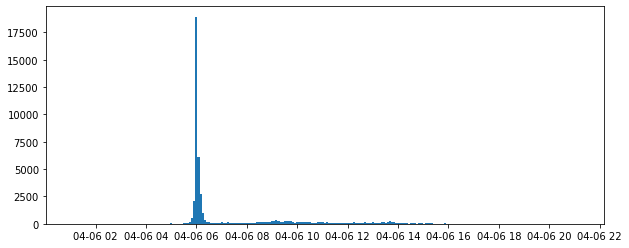

In [16]:
fig = plt.figure(figsize=(10,4))
plt.hist(pd.to_datetime(clocktimes_clean), bins='auto');

We're not going to spend a huge amount of time making this plot nice. It suffices to note that no measurements come in at midnight, so we'll use 00:00:00 as a placeholder for NaN

In [17]:
def datetime_nan_processor(s):
    date = s.split()[0]
    time = s.split()[1]
    if time == "nan":
        time = "00:00:00"
    return " ".join([date, time])

In [18]:
datetimes = datetimes.map(datetime_nan_processor)

In [27]:
datetimes[datetimes.str.len() < 19]

Series([], Name: Date_Collected_Time_Collected, dtype: object)

In [28]:
(results["Date_Collected_Time_Collected"].str.len()<19).sum()

1693

### Activity_ID

In [18]:
results["Activity_ID"].map(lambda x: len(x)).value_counts().sort_index()

15        1
16       50
17     1598
18     2601
19    17501
20    12350
21     9525
22     1678
23      334
24      209
25       47
26      115
27      137
28       84
30        4
31        3
32      213
Name: Activity_ID, dtype: int64

Without spending too much time looking, this seems fine.

### Lab_ID

In [19]:
nans = ["None", "Unknown", "LabID", "none", "NONE", "None "]

In [20]:
with pd.option_context("display.max_rows", None):
    display(results["Lab_ID"].map(lambda x: "nan" if x in nans else x).value_counts())

nan                  22543
8                       25
9                       20
7                       20
6                       20
5                       20
43101                   15
39556                   15
39428                   14
10                      13
1                       13
3                       13
4                       13
2                       13
AA233                   12
43594                   12
AA226                   12
AA228                   12
AA227                   12
AA229                   12
AA232                   12
AA231                   12
AA235                   12
AA234                   12
40720                   11
99002946                10
01062335                10
98044199                10
98067525                10
98044200                10
01037923                10
41152                   10
01008162                10
97051413                10
98044228                10
99020438                10
55167                   10
4

In [21]:
results["Lab_ID"] = results["Lab_ID"].map(lambda x: "nan" if x in nans else x)

### Site_ID

In [22]:
with pd.option_context("display.max_rows", None):
    display(results["Site_ID"].value_counts())

012S                 1576
534S                 1541
35CS                 1530
290S                 1529
662S                 1528
743S                 1484
784S                 1467
763S                 1415
4LONG                1403
90CS                 1387
387S                 1363
3BU                  1312
609S                 1295
1NBS                 1267
2LARZ                1251
CB                   1052
ND                    907
199S                  868
400S                  858
621S                  852
130S                  768
567S                  765
484S                  759
729S                  759
165S                  756
700S                  747
59CS                  739
760T                  738
675S                  732
269T                  720
343S                  712
773S                  712
521S                  704
229S                  671
635S                  660
715S                  648
318S                  640
267S                  589
591S        

### Project_ID

In [23]:
with pd.option_context("display.max_rows", None):
    display(results["Project_ID"].value_counts())

7.0    33485
3.0     5370
1.0     5035
2.0     1504
5.0     1056
Name: Project_ID, dtype: int64

In [24]:
results["Project_ID"] = results["Project_ID"].astype(int)

### Actual_Result
I have no idea how to handle this column! I will defer to a later date.

In [25]:
with pd.option_context("display.max_rows", None):
    display(results["Actual_Result"].value_counts())

20                   1060
10                   1044
5                     429
30                    415
40                    382
<10                   375
0                     351
4                     328
41                    328
50                    316
52                    312
60                    301
1                     299
3                     296
31                    292
2                     289
<10.0                 285
6                     276
8                     267
70                    263
<5.00                 255
63                    250
80                    248
7                     241
110                   237
74                    224
25                    224
120                   222
23                    222
18                    218
100                   214
90                    210
12                    204
9                     203
15                    202
22                    198
11                    198
16                    191
24          

### Actual_Result_Unit_ID
Note that we've mapped `nan` to `-1`.

In [26]:
with pd.option_context("display.max_rows", None):
    display(results["Actual_Result_Unit_ID"].value_counts())

4.0     9579
3.0     7473
5.0     6756
10.0    6703
7.0     5581
14.0    3083
13.0    1963
15.0    1077
11.0    1026
1.0      849
12.0     776
9.0      588
6.0      385
2.0      341
16.0     255
8.0       13
Name: Actual_Result_Unit_ID, dtype: int64

In [27]:
results["Actual_Result_Unit_ID"] = results["Actual_Result_Unit_ID"].map(lambda x: int(x) if x == x else -1)

### Result_Sample_Fraction

In [28]:
results["Result_Sample_Fraction"].value_counts()

Total        22064
Dissolved     2006
Unknown        290
Total           25
Free            14
Name: Result_Sample_Fraction, dtype: int64

### Reporting_Result

In [29]:
results["Reporting_Result"].loc[results["Reporting_Result"].isna()]

675     NaN
687     NaN
33654   NaN
33655   NaN
33656   NaN
36938   NaN
36939   NaN
36940   NaN
38140   NaN
38142   NaN
Name: Reporting_Result, dtype: float64

### Reporting_Result_Unit_ID

In [30]:
results["Reporting_Result_Unit_ID"].value_counts()

4.0     9579
7.0     8515
3.0     7288
10.0    6898
5.0     6758
13.0    1963
11.0    1026
1.0      849
15.0     792
12.0     776
14.0     679
9.0      588
6.0      385
2.0      341
8.0       13
Name: Reporting_Result_Unit_ID, dtype: int64

In [31]:
results["Reporting_Result_Unit_ID"].isna().sum()

0

In [32]:
results["Reporting_Result_Unit_ID"] = results["Reporting_Result_Unit_ID"].astype(int)

### Collection_ID

In [33]:
results["Collection_ID"].value_counts()

N-BUBR            14717
C-BABR             7477
N-DL               6077
C-MGBN             4926
C-MGBO             4741
N-BABR             2298
C-IS               1089
C-MGW               614
N-MGW               492
C-SPBR              470
N-MGBO              378
N-MGBN              361
N-BUBN              333
MyRWA-other         324
C-SPBN              294
MyRWA-baseline      278
N-BUW               252
Chelsea             245
C-BABN              132
N-SPBN              104
N-BABN               83
N-SPBR               78
EPA                  39
C-BAW                13
N-BAW                 9
C-BUBR                1
Name: Collection_ID, dtype: int64

### Analytical_Method_ID

In [34]:
with pd.option_context("display.max_rows", None):
    display(results["Analytical_Method_ID"].value_counts())

Therm-Temp-2012                8737
MWRA-EC-2012                   5133
Field-Depth                    3615
Field-Depth-2012               3176
MWRA-FC                        2670
MWRA-EC                        1392
G&L-EC-2012                    1139
Hydrolab-DO                     712
Alpha-TP                        669
Hydrolab-pH                     665
MWRA-N/N                        651
G&L-EC                          627
MWRA-TP                         620
MWRA-Ent-2012                   600
MWRA-ChlorA                     596
MWRA-OP-D                       578
MWRA-Phaeo                      577
MWRA-TN                         559
Hydrolab-DO-2012                542
MWRA-NH3-D                      512
MyRWA-other                     494
MWRA-Ent                        473
Alpha-TSS                       469
MWRA-TP-2012                    464
MWRA-NH3D-2012                  463
MWRA-TSS-2012                   459
MWRA-TN-2012                    455
MWRA-OPD-2012               

### Associated_ID
Not sure what to make of this column

In [35]:
with pd.option_context("display.max_rows", None):
    display(results["Associated_ID"].value_counts())

CYN20100708SPSAL01,CYN20100708SPSAL02,CYN20100708S    14
CYN20100715SDPCY01,CYN20100715SDPCY02,CYN20100715S    14
CYN20100715SDDO01,CYN20100715SDDO02,CYN20100715SDD    14
CYN20100715SDSAL01,CYN20100715SDSAL02,CYN20100715S    14
CYN20100708SPDO%01,CYN20100708SPDO%02,CYN20100708S    14
CYN20100913CBDO%01,CYN20100913CBDO%02,CYN20100913C    14
CYN20100715SDBP01,CYN20100715SDBP02,CYN20100715SDB    14
CYN20100715SDDO%01,CYN20100715SDDO%02,CYN20100715S    14
CYN20100708SPPH01,CYN20100708SPPH02,CYN20100708SPP    14
CYN20100708SPBP01,CYN20100708SPBP02,CYN20100708SPB    14
CYN20100913CBTemp01,CYN20100913CBTemp02,CYN2010091    14
CYN20100708SPSC01,CYN20100708SPSC02,CYN20100708SPS    14
CYN20100708SPDO01,CYN20100708SPDO02,CYN20100708SPD    14
CYN20100913CBPCY01,CYN20100913CBPCY02,CYN20100913C    14
CYN20100708SPPCY01,CYN20100708SPPCY02,CYN20100708S    14
CYN20100715SDPH01,CYN20100715SDPH02,CYN20100715SDP    14
CYN20100913CBSC01,CYN20100913CBSC02,CYN20100913CBS    14
CYN20100913CBPH01,CYN20100913CB

### Result_Comment
In principle we could factor out the majority of these comments into a few buckets, and then have a different column that only contains rarer ones. That way comments like `"Averaged duplicates. Units conversion."` could be accurately represented in two columns. Would lend itself more easily if this somehow becomes relevant to analysis. As is, I'm just going to map similar comments onto each other and leave them otherwise.

In [36]:
# with pd.option_context("display.max_rows", None):
#     display(results["Result_Comment"].str.rstrip().value_counts())

In [37]:
merge = {
    "Units conversion.": "Units conversion",
    "Average of duplicates.": "Averaged duplicates",
    "Averaged duplicates.": "Averaged duplicates",
    "Units converson": "Units conversion",
    "Units converstion": "Units conversion",
    "average of dupl.": "Averaged duplicates",
    "Averaged Duplicates": "Averaged duplicates",
    "Average of Duplicates": "Averaged duplicates",
}

In [38]:
results["Result_Comment"] = results["Result_Comment"].str.rstrip().replace(merge).value_counts()

### Field_Comment
This column seems more idiosyncratic so we'll leave it be.

In [39]:
# with pd.option_context("display.max_rows", None):
display(results["Field_Comment"].value_counts())

Special Study                                                             585
Surface Readings, Depth not calibrated                                    190
Circulator on                                                             108
Clear water. No odor.                                                      83
Heavy boat traffic                                                         61
                                                                         ... 
Visible waterfall, slight foam, clear + chilly weather. Moderate flow,      1
BIG fish jumping                                                            1
Sampled downstream                                                          1
Dark.                                                                       1
Water running fast, clear, cold.                                            1
Name: Field_Comment, Length: 2787, dtype: int64

### Event_Comment
Again, kind of idiosyncratic. There doesn't seem to be anything obvious to merge together, so we'll leave it be.

In [40]:
# with pd.option_context("display.max_rows", None):
#     display(results["Event_Comment"].str.rstrip().value_counts())

### QAQC_Comment

In [41]:
with pd.option_context("display.max_rows", None):
    display(results["QAQC_Comment"].str.rstrip().value_counts())

FDUP                                                  6002
EQBL                                                   528
Bloom                                                   48
Sonde was malfunctioning on date samples were coll      36
Dissolved oxygen not calibrated because of damaged      28
Internal battery level was insufficient to support      27
CB was not sampled on this date due to closure of       27
Should have been bloom                                  24
EQRP                                                    17
Circulator off                                          14
Suspect reading taken I                                  9
FDUP Rejected                                            8
Need to check these data                                 8
Suspect reading taken in air                             1
93.3333333333333                                         1
Name: QAQC_Comment, dtype: int64

### Percent_RPD
Here we round to 2 decimal places. We assume a missing value is comparable to `"Not calculated."`.

In [42]:
results["Percent_RPD"] = results["Percent_RPD"].map(lambda x: np.round(float(x),2) if (x==x and x.rstrip() != "Not calculated.") else np.nan).value_counts()

### QAQC_Status

In [43]:
with pd.option_context("display.max_rows", None):
    display(results["QAQC_Status"].str.rstrip().value_counts())

Preliminary             24990
Historic                 7841
Final/Accepted           6622
Final-Accepted           6179
Final/Admin               397
Historic-Rejected         117
Final/Rejected            102
Final-Rejected             42
Rejected                   32
Final - Accepted           32
Preliminary-Rejected       26
Private/Preliminary         7
Historic- Rejected          6
Admin/Rejected              2
Historic Rejected           1
Name: QAQC_Status, dtype: int64

### Data_Type_Name

In [44]:
with pd.option_context("display.max_rows", None):
    display(results["Data_Type_Name"].str.rstrip().value_counts())

Non-critical    25524
Critical        20079
Unknown           847
Name: Data_Type_Name, dtype: int64

In [45]:
results["Data_Type_Name"].isna().sum()

0

### Media_Type_Name

In [46]:
with pd.option_context("display.max_rows", None):
    display(results["Media_Type_Name"].str.rstrip().value_counts())


Water    46450
Name: Media_Type_Name, dtype: int64

In [47]:
results["Media_Type_Name"].isna().sum()

0

### Media_Subdivision_Name

In [48]:
with pd.option_context("display.max_rows", None):
    display(results["Media_Subdivision_Name"].str.rstrip().value_counts())

Surface Water    46450
Name: Media_Subdivision_Name, dtype: int64

In [49]:
results["Media_Subdivision_Name"].isna().sum()

0

### Component_Name

In [50]:
with pd.option_context("display.max_rows", None):
    display(results["Component_Name"].str.rstrip().value_counts())

Temperature, water                               9579
Escherichia coli                                 8414
Depth                                            7143
Fecal coliform                                   4458
Phosphorus                                       1905
Enterococcus                                     1304
Total suspended solids                           1225
Specific conductance                             1154
Inorganic nitrogen (nitrate and nitrite)         1148
Dissolved oxygen (DO)                            1037
Orthophosphate                                   1031
pH                                               1026
Nitrogen                                         1014
Ammonia                                          1007
Chlorophyll a                                     999
Pheophytin a                                      977
Salinity                                          776
Dissolved oxygen saturation                       673
Algae, blue-green (phylum cy

In [51]:
results["Component_Name"].isna().sum()

0

### Activity_Type

In [52]:
with pd.option_context("display.max_rows", None):
    display(results["Activity_Type"].str.rstrip().value_counts())

Sample-Routine                                21419
Field Msr/Obs                                 15339
Field Msr/Obs-Portable Data Logger             5064
Quality Control Sample-Field Replicate         2123
Quality Control Field Replicate Msr/Obs        1960
Quality Control Sample-Equipment Blank          528
Quality Control Sample-Equipment Replicate       17
Name: Activity_Type, dtype: int64

In [53]:
results["Activity_Type"].isna().sum()

0

### Result_Type_ID_x
In the following sections, we rename the columns to be more informative.

In [54]:
results.columns

Index(['Date_Collected_Time_Collected', 'Activity_ID', 'Lab_ID', 'Site_ID',
       'Project_ID', 'Actual_Result', 'Actual_Result_Unit_ID',
       'Result_Sample_Fraction', 'Reporting_Result',
       'Reporting_Result_Unit_ID', 'Collection_ID', 'Analytical_Method_ID',
       'Associated_ID', 'Result_Comment', 'Field_Comment', 'Event_Comment',
       'QAQC_Comment', 'Percent_RPD', 'QAQC_Status', 'Data_Type_Name',
       'Media_Type_Name', 'Media_Subdivision_Name', 'Component_Name',
       'Activity_Type', 'Result_Type_ID_x', 'Result_Type_x',
       'Result_Type_ID_y', 'Result_Type_y', 'Relative_Depth_Name'],
      dtype='object')

In [55]:
results.rename(columns={"Result_Type_ID_x": "Actual_Result_Type_ID",
                        "Result_Type_ID_y": "Reporting_Result_Type_ID",
                        "Result_Type_x": "Actual_Result_Type",
                        "Result_Type_y": "Reporting_Result_Type",
                       }, inplace=True)

In [56]:
results.columns

Index(['Date_Collected_Time_Collected', 'Activity_ID', 'Lab_ID', 'Site_ID',
       'Project_ID', 'Actual_Result', 'Actual_Result_Unit_ID',
       'Result_Sample_Fraction', 'Reporting_Result',
       'Reporting_Result_Unit_ID', 'Collection_ID', 'Analytical_Method_ID',
       'Associated_ID', 'Result_Comment', 'Field_Comment', 'Event_Comment',
       'QAQC_Comment', 'Percent_RPD', 'QAQC_Status', 'Data_Type_Name',
       'Media_Type_Name', 'Media_Subdivision_Name', 'Component_Name',
       'Activity_Type', 'Actual_Result_Type_ID', 'Actual_Result_Type',
       'Reporting_Result_Type_ID', 'Reporting_Result_Type',
       'Relative_Depth_Name'],
      dtype='object')

In [57]:
results.drop(columns=["Actual_Result_Type_ID", "Reporting_Result_Type_ID"], inplace=True)

### Result_Type_x

### Result_Type_ID_y

### Result_Type_y

### Relative_Depth_Name

In [58]:
with pd.option_context("display.max_rows", None):
    display(results["Relative_Depth_Name"].value_counts())

Surface    46345
Bottom       105
Name: Relative_Depth_Name, dtype: int64

In [69]:
results.to_csv("../data/charles_river_samples_interim/results_merged_cleaned.csv",index=False)

## Checking Actual vs Reporting Results

In [59]:
"6..25".replace('..', '.')

'6.25'

In [60]:
def cast_except(x):
    try:
        return float(x)
    except:
        return np.nan

In [61]:
plt.figure(figsize=(160,8));

<Figure size 11520x576 with 0 Axes>

In [62]:
import seaborn as sns

In [63]:
# sns.distplot(results["Actual_Result"].map(cast_except) / results["Reporting_Result"].map(cast_except).dropna())

In [64]:
# results["Actual_Result"] = results["Actual_Result"].str.replace("\..", "\.").str.replace("\\\\", "").str.replace("*","").astype(float)

In [65]:
# results["Reporting_Result"].astype(float) / results["Actual_Result"].astype(float)

# Examining Measurements + Results
We have a list of compounds that were measured:

In [66]:
df_dict["Component"]

,Component_ID,Component_Name
0,1,"Algae, blue-green (phylum cyanophyta) density"
1,2,Ammonia
2,3,Ammonium
3,4,Barometric pressure
4,5,Chlorine
5,6,Chlorophyll a
6,7,Conductivity
7,8,Depth
8,9,Dissolved oxygen (DO)
9,10,Dissolved oxygen saturation


In [67]:
threshholds = {}
threshholds["Chlorine"] = 4.01
threshholds["Escherichia coli"] = 4.01